In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/gungunkumari/Downloads/Amazon Sale Report.csv',encoding='latin-1')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [6]:
df.shape

(128976, 21)

### Handling Null Values

In [7]:
#Checking for any null values
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

<Axes: >

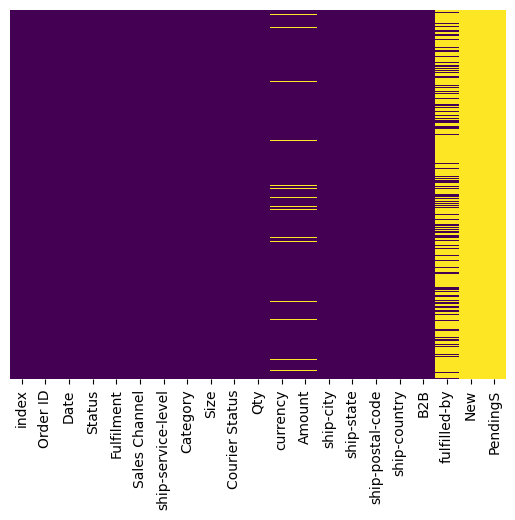

In [8]:
#Plot showing column wise null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#New and PendingS columns have no data and can be dropped.
df.drop(['PendingS', 'New'], axis=1 , inplace=True)

In [10]:
#Checking for unique values
fulfilled_by_counts = df['fulfilled-by'].value_counts()
fulfilled_by_counts

fulfilled-by
Easy Ship    39263
Name: count, dtype: int64

In [11]:
#As there are only one type of few values in fulfilled-by column, i'll drop it
df.drop(['fulfilled-by'], axis=1 , inplace=True)

In [12]:
df.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
90675,90674,404-7876863-9852357,05-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1,INR,591.00,Pandav nagar janta garden,Delhi,110091.0,IN,False
2473,2472,404-7652245-0425103,04-29-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XXL,Shipped,1,INR,597.00,KOLKATA,WEST BENGAL,700151.0,IN,False
34657,34656,407-5245986-3165135,04-10-2022,Cancelled,Merchant,Amazon.in,Standard,Wallet,Free,On the Way,0,INR,1266.66,DAUND,MAHARASHTRA,413801.0,IN,False
60146,60145,402-2339904-2264304,05-23-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Shirt,XXL,Shipped,1,INR,380.00,Hyderabad,TELANGANA,500050.0,IN,False
14001,14000,403-6422335-7005958,04-22-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,626.00,BELGAUM,KARNATAKA,591124.0,IN,False


In [13]:
#Unique Country names
shipping_counts = df['ship-country'].value_counts()
shipping_counts

ship-country
IN    128941
Name: count, dtype: int64

In [14]:
#As there's only one shipping country i'll replace it with mode
mode_value = df['ship-country'].mode()[0]
df.fillna({'ship-country': mode_value}, inplace=True)

In [15]:
df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country             0
B2B                      0
dtype: int64

In [16]:
ship_postal_counts = df['ship-postal-code'].value_counts()
ship_postal_counts

ship-postal-code
201301.0    1008
122001.0     686
560037.0     632
560068.0     613
560076.0     582
            ... 
721124.0       1
686587.0       1
790001.0       1
142038.0       1
629152.0       1
Name: count, Length: 9454, dtype: int64

In [17]:
mode_value = df['ship-postal-code'].mode()[0]
df.fillna({'ship-postal-code': mode_value}, inplace=True)

In [18]:
mode_value = df['ship-state'].mode()[0]
df.fillna({'ship-state': mode_value}, inplace=True)

In [19]:
mode_value = df['ship-city'].mode()[0]
df.fillna({'ship-city': mode_value}, inplace=True)

In [20]:
currency_count = df['currency'].value_counts()
currency_count

currency
INR    121176
Name: count, dtype: int64

In [21]:
mode_value = df['currency'].mode()[0]
df.fillna({'currency': mode_value}, inplace=True)

In [22]:
df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7800
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
B2B                      0
dtype: int64

In [23]:
df.shape

(128976, 18)

In [24]:
fill_values = {
    'Amount': df['Amount'].mean()
}
df.fillna(fill_values, inplace=True)

### Converting Data Types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            128976 non-null  object 
 12  Amount              128976 non-null  float64
 13  ship-city           128976 non-null  object 
 14  ship-state          128976 non-null  object 
 15  ship-postal-code    128976 non-nul

In [26]:
# Converting Date column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/2k/bb2r0bbx3yld16c44mb19k040000gn/T/ipykernel_1101/557291502.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            128976 non-null  object        
 12  Amount              128976 non-null  float64       
 13  ship-city           128976 no

In [28]:
#Working with Date column
df['date'] = df['Date'].dt.day
df['month_no'] = df['Date'].dt.month
df['month'] = df['Date'].dt.month_name()
df['dow_name'] = df['Date'].dt.day_name()
df['date_is_weekend'] = np.where(df['dow_name'].isin(['Sunday', 'Saturday']), 1,0)
df['year'] = df['Date'].dt.year

In [29]:
df.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,ship-country,B2B,date,month_no,month,dow_name,date_is_weekend,year
70826,70825,171-0257471-4120358,2022-05-14,Cancelled,Amazon,Amazon.in,Expedited,Blazzer,XXL,Unshipped,...,MAHARASHTRA,400075.0,IN,False,14,5,May,Saturday,1,2022
42107,42106,406-4335695-8832352,2022-04-05,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,HARYANA,121001.0,IN,False,5,4,April,Tuesday,0,2022
28357,28356,402-0608004-3003554,2022-04-13,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,...,TELANGANA,500047.0,IN,False,13,4,April,Wednesday,0,2022
39842,39841,402-4411074-9089165,2022-04-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,L,Shipped,...,DELHI,110065.0,IN,False,6,4,April,Wednesday,0,2022
19708,19707,406-3937486-0033938,2022-04-18,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,...,TELANGANA,500060.0,IN,False,18,4,April,Monday,0,2022


In [30]:
#Checking Unique years 
year_count = df['year'].value_counts()
year_count

year
2022    128976
Name: count, dtype: int64

### Dropping not needed columns

In [31]:
#As it's only 2022 dataset i'll drop the date_year column and also the Date column
df.drop(columns=['year','Date']).head()

,index,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,ship-city,ship-state,ship-postal-code,ship-country,B2B,date,month_no,month,dow_name,date_is_weekend
0,0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,...,MUMBAI,MAHARASHTRA,400081.0,IN,False,30,4,April,Saturday,1
1,1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,...,BENGALURU,KARNATAKA,560085.0,IN,False,30,4,April,Saturday,1
2,2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,30,4,April,Saturday,1
3,3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,30,4,April,Saturday,1
4,4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,...,CHENNAI,TAMIL NADU,600073.0,IN,False,30,4,April,Saturday,1


In [32]:
df.drop(columns=['currency', 'ship-country']).head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-city,ship-state,ship-postal-code,B2B,date,month_no,month,dow_name,date_is_weekend,year
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,MUMBAI,MAHARASHTRA,400081.0,False,30,4,April,Saturday,1,2022
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,BENGALURU,KARNATAKA,560085.0,False,30,4,April,Saturday,1,2022
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,NAVI MUMBAI,MAHARASHTRA,410210.0,True,30,4,April,Saturday,1,2022
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,PUDUCHERRY,PUDUCHERRY,605008.0,False,30,4,April,Saturday,1,2022
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,CHENNAI,TAMIL NADU,600073.0,False,30,4,April,Saturday,1,2022


# 1. Sales Overview

In [33]:
#Question 1: What was the best month for sales? How much was earned that month?

<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='Date'>

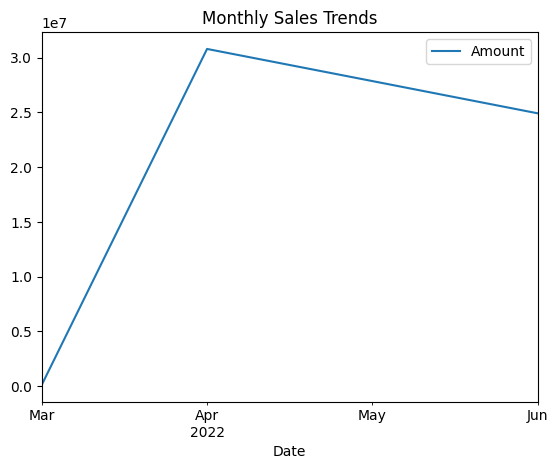

In [34]:
sales_trends = df.groupby(df['Date'].dt.to_period('M')).agg({'Amount': 'sum'})
sales_trends.plot(kind='line', title='Monthly Sales Trends')

As per the dataset, March month of 2022 saw no sales and april got the highest sales among may and june

In [35]:
results = df.groupby('month')['Amount'].sum()
results

month
April    3.078448e+07
June     2.490648e+07
March    1.075209e+05
May      2.785048e+07
Name: Amount, dtype: float64

In [36]:
#Question 2: Sales variation by day of the week

<Axes: title={'center': 'Sales by Day of the Week'}, xlabel='Date'>

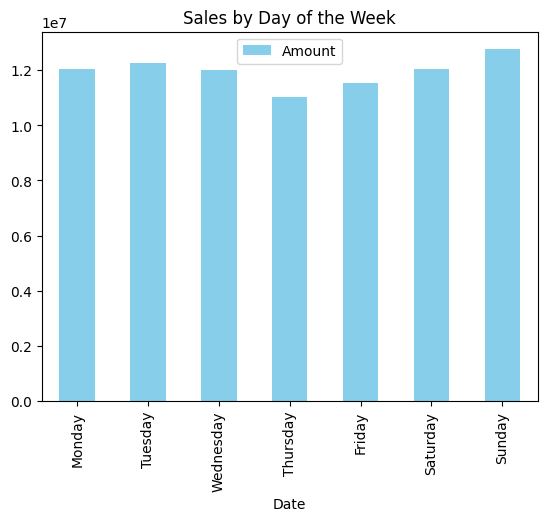

In [37]:
sales_by_day = df.groupby(df['Date'].dt.day_name()).agg({'Amount': 'sum'})
sales_by_day = sales_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sales_by_day.plot(kind='bar', color='skyblue' , title='Sales by Day of the Week')

In [38]:
#Question 3: Total revenue generated

In [39]:
total_revenue = df['Amount'].sum()
print(f'Total Revenue: INR {total_revenue:.2f}')

Total Revenue: INR 83648955.22


In [40]:
#Top-selling product categories by revenue
top_categories_revenue = df.groupby('Category').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False)
top_categories_revenue

,Amount
Category,
T-shirt,4.131004e+07
Shirt,2.334982e+07
Blazzer,1.173201e+07
Trousers,5.642031e+06
Perfume,8.322248e+05
Wallet,4.875935e+05
Socks,1.637287e+05
Shoes,1.305898e+05
Watch,9.150000e+02


In [41]:
#Question 4: What city has the highest sales?

In [42]:
results = df.groupby('ship-city')['Amount'].sum()
results
#df = df_sale.groupby('Gender').sum(numeric_only=True)

ship-city
(Chikmagalur disterict).     (N.R pur thaluku)     389.0
(Via Cuncolim)Quepem,South Goa                    1163.0
,HYDERABAD                                         563.0
,raibarely road faizabad (Ayodhya)                1122.0
..katra                                            641.0
                                                   ...  
yavatmal                                           735.0
yazali                                             487.0
yellapur                                           824.0
zirakpur                                           852.0
ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½              2003.0
Name: Amount, Length: 8948, dtype: float64

# 2. Product Analysis

In [43]:
#Question 1: What products are most often sold together?

In [44]:
df.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,ship-country,B2B,date,month_no,month,dow_name,date_is_weekend,year
62235,62234,405-4297427-9388325,2022-05-21,Cancelled,Merchant,Amazon.in,Standard,Trousers,XXL,On the Way,...,UTTARAKHAND,248001.0,IN,False,21,5,May,Saturday,1,2022
19615,19614,406-7736558-5197905,2022-04-18,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,L,Shipped,...,TAMIL NADU,600002.0,IN,False,18,4,April,Monday,0,2022
20507,20506,171-1146555-6029935,2022-04-18,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,...,KARNATAKA,560066.0,IN,False,18,4,April,Monday,0,2022
114788,114787,408-3612514-8824345,2022-06-10,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,UTTAR PRADESH,201301.0,IN,False,10,6,June,Friday,0,2022
80667,80666,403-2574794-4108357,2022-05-06,Shipped,Amazon,Amazon.in,Expedited,Perfume,Free,Shipped,...,WEST BENGAL,700084.0,IN,False,6,5,May,Friday,0,2022


Here, by carefully observing the data, we can say that if the Order ID of two or more rows match, the corresponding Products were sold together.

In [45]:
# Keeping only the ones which have duplicated Order ID
data = df[df['Order ID'].duplicated(keep=False)]

# Joining all the Products with same Order ID by ',' and storing in 'Grouped' column
data['Grouped'] = data.groupby('Order ID')['Category'].transform(lambda x: ','.join(x))

# Take only the Order ID and Grouped columns and drop duplicates
data = data[['Order ID', 'Grouped']].drop_duplicates()
data.head(10)

/var/folders/2k/bb2r0bbx3yld16c44mb19k040000gn/T/ipykernel_1101/3956072752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = data.groupby('Order ID')['Category'].transform(lambda x: ','.join(x))


,Order ID,Grouped
6,408-5748499-6859555,"T-shirt,T-shirt"
7,406-7807733-3785945,"Shirt,Shirt"
8,407-5443024-5233168,"T-shirt,T-shirt"
9,402-4393761-0311520,"Shirt,Shirt"
10,407-5633625-6970741,"Shirt,Shirt"
11,171-4638481-6326716,"Shirt,Shirt"
12,405-5513694-8146768,"Shirt,Shirt"
13,408-7955685-3083534,"T-shirt,T-shirt"
37,403-4367956-2849158,"Shirt,Shirt"
61,404-2262140-4696366,"Shirt,Shirt"


In [46]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('Shirt', 'Shirt') 4367
('T-shirt', 'T-shirt') 3064
('Shirt', 'T-shirt') 834
('T-shirt', 'Shirt') 777
('Blazzer', 'Blazzer') 603
('Trousers', 'Trousers') 548
('Blazzer', 'Shirt') 200
('Shirt', 'Blazzer') 197
('T-shirt', 'Blazzer') 123
('Blazzer', 'T-shirt') 116


In [47]:
df.groupby('Order ID').count().sort_values(['Category'], axis=0, ascending=False)

,index,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,ship-state,ship-postal-code,ship-country,B2B,date,month_no,month,dow_name,date_is_weekend,year
Order ID,,,,,,,,,,,,,,,,,,,,,
403-4984515-8861958,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
171-5057375-2831560,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
403-0173977-3041148,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
404-9932919-6662730,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
408-3317403-1729937,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403-8085109-4469119,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
403-8082466-1980335,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
403-8080106-2087512,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


From the above table we can see that a particular Order ID occurs at most 12 times.

In [48]:
from itertools import combinations
from collections import Counter

for comb in range(2, 13):
    count = Counter()
    print(f"\nTaking {comb} items at a time:")
    for row in data['Grouped']:
        row_list = row.split(',')
        count.update(Counter(combinations(row_list, comb)))
    
    for key, value in count.most_common(10):
        print(key, value)


Taking 2 items at a time:
('Shirt', 'Shirt') 4367
('T-shirt', 'T-shirt') 3064
('Shirt', 'T-shirt') 834
('T-shirt', 'Shirt') 777
('Blazzer', 'Blazzer') 603
('Trousers', 'Trousers') 548
('Blazzer', 'Shirt') 200
('Shirt', 'Blazzer') 197
('T-shirt', 'Blazzer') 123
('Blazzer', 'T-shirt') 116

Taking 3 items at a time:
('Shirt', 'Shirt', 'Shirt') 1518
('T-shirt', 'T-shirt', 'T-shirt') 763
('Shirt', 'Shirt', 'T-shirt') 309
('Shirt', 'T-shirt', 'T-shirt') 289
('Shirt', 'T-shirt', 'Shirt') 287
('T-shirt', 'Shirt', 'Shirt') 186
('T-shirt', 'T-shirt', 'Shirt') 183
('T-shirt', 'Shirt', 'T-shirt') 154
('Blazzer', 'Blazzer', 'Blazzer') 136
('Shirt', 'Blazzer', 'Shirt') 93

Taking 4 items at a time:
('Shirt', 'Shirt', 'Shirt', 'Shirt') 866
('T-shirt', 'T-shirt', 'T-shirt', 'T-shirt') 284
('Shirt', 'Shirt', 'T-shirt', 'Shirt') 273
('Shirt', 'Shirt', 'Shirt', 'T-shirt') 214
('Shirt', 'Shirt', 'T-shirt', 'T-shirt') 194
('Shirt', 'T-shirt', 'T-shirt', 'T-shirt') 177
('Shirt', 'T-shirt', 'Shirt', 'Shirt'

In [49]:
#Question 2: What product sold the most?

In [50]:
product_group = df.groupby('Category')
quantity_ordered = product_group.sum(numeric_only=True)['Qty']
quantity_ordered

Category
Blazzer     13943
Perfume      1051
Shirt       45044
Shoes         153
Socks         399
T-shirt     45292
Trousers     9898
Wallet        863
Watch           3
Name: Qty, dtype: int64

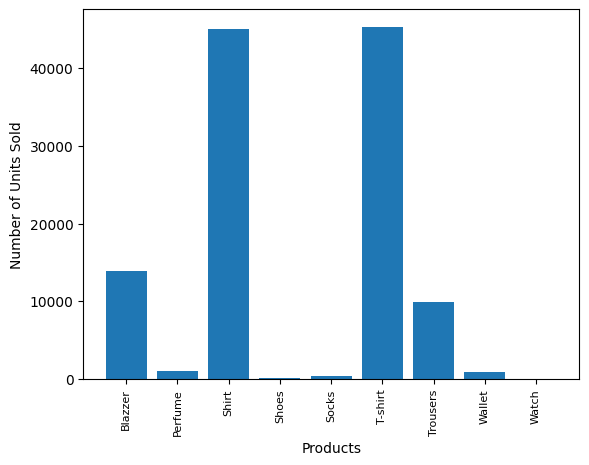

In [51]:
products = quantity_ordered.index

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Number of Units Sold')
plt.xlabel('Products')
plt.show()

In [52]:
#Question3 What is the distribution of product sizes sold, and which sizes are the most popular?

In [53]:
df['Size'] = df['Size'].astype('category')

In [54]:
qty_cat = df.groupby('Size')['Qty'].sum()

/var/folders/2k/bb2r0bbx3yld16c44mb19k040000gn/T/ipykernel_1101/3234128067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qty_cat = df.groupby('Size')['Qty'].sum()


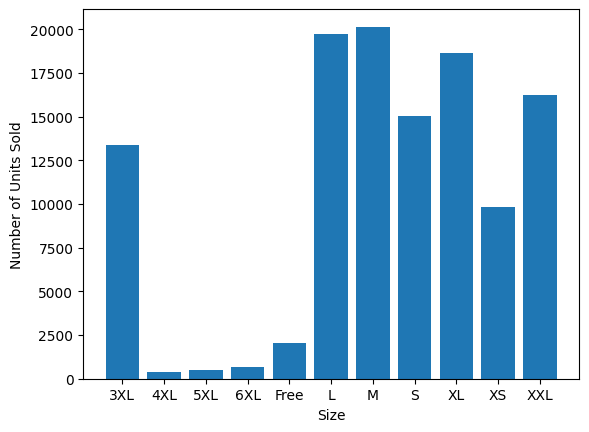

In [55]:
sizes = qty_cat.index
plt.bar(sizes, qty_cat)
plt.ylabel('Number of Units Sold')
plt.xlabel('Size')
plt.show()

The most popular sizes are Medium, Large and XL

In [56]:
#Question4 What is the return or cancellation rate by product category?

In [57]:
df.shape

(128976, 24)

<Axes: title={'center': 'Cancellation Rate by Product Category'}, xlabel='Category'>

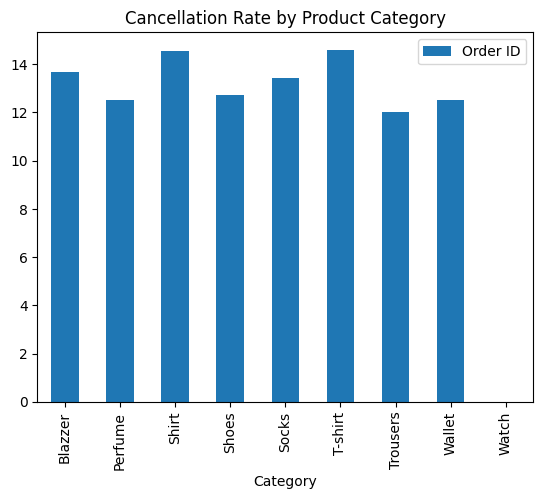

In [58]:
return_rate = df[df['Status'] == 'Cancelled'].groupby('Category').agg({'Order ID': 'count'})
total_orders_by_category = df.groupby('Category').agg({'Order ID': 'count'})
cancellation_rate = (return_rate / total_orders_by_category) * 100
cancellation_rate.plot(kind='bar', title='Cancellation Rate by Product Category')

In [59]:
#Question5 How does the average selling price differ by product category?

In [60]:
average_price_by_category = df.groupby('Category').agg({'Amount': 'mean'}).sort_values(by='Amount', ascending=False)
average_price_by_category

,Amount
Category,
T-shirt,821.403877
Shoes,791.453452
Blazzer,756.903753
Perfume,719.295388
Trousers,531.464832
Wallet,526.558831
Shirt,468.148060
Socks,372.110781
Watch,305.000000


# 3. Fulfillment Analysis

In [61]:
#Question 1: Distribution of orders fulfilled by Amazon vs. third-party merchants

<Axes: title={'center': 'Fulfillment Distribution'}, ylabel='count'>

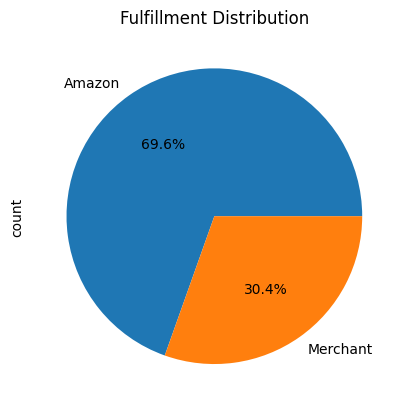

In [62]:
fulfillment_distribution = df['Fulfilment'].value_counts()
fulfillment_distribution.plot(kind='pie', autopct='%1.1f%%', title='Fulfillment Distribution')

In [63]:
#Question 2: Fulfillment method effect on delivery times (assuming 'Courier Status' gives insights)

In [64]:
delivery_times = df.groupby('Fulfilment').agg({'Courier Status': 'count'})
delivery_times

,Courier Status
Fulfilment,
Amazon,89713
Merchant,39263


In [65]:
# Question 3: Percentage of orders shipped using different service levels

<Axes: title={'center': 'Distribution of Shipping Service Levels'}, xlabel='ship-service-level'>

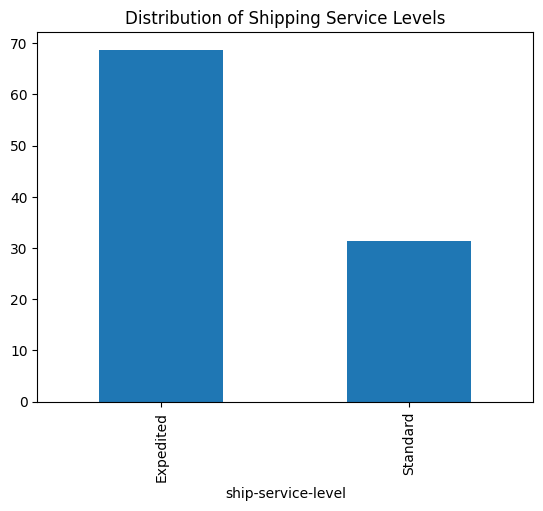

In [66]:
service_level_distribution = df['ship-service-level'].value_counts(normalize=True) * 100
service_level_distribution.plot(kind='bar', title='Distribution of Shipping Service Levels')

In [67]:
# Question 4: On-time delivery rate by fulfillment method (using Courier Status)

In [68]:
on_time_delivery = df[df['Courier Status'] == 'Shipped'].groupby('Fulfilment').agg({'Order ID': 'count'})
total_orders_fulfillment = df.groupby('Fulfilment').agg({'Order ID': 'count'})
on_time_delivery_rate = (on_time_delivery / total_orders_fulfillment) * 100
on_time_delivery_rate

,Order ID
Fulfilment,
Amazon,86.517004
Merchant,81.168021


In [69]:
# Question 5:Impact of fulfillment method on cancellations or returns

In [70]:
cancellation_by_fulfillment = df[df['Status'] == 'Cancelled'].groupby('Fulfilment').agg({'Order ID': 'count'})
cancellation_by_fulfillment

,Order ID
Fulfilment,
Amazon,11475
Merchant,6859


# 4. Customer Segmentation

In [71]:
#Question 1 : Customer segments based on purchase behavior (simplified segmentation)

In [72]:
customer_segments = df.groupby('ship-state').agg({'Amount': ['mean', 'sum'], 'Order ID': 'count'}).sort_values(by=('Amount', 'sum'), ascending=False)
customer_segments

Amount               Order ID
                     mean           sum    count
ship-state                                      
MAHARASHTRA    633.511635  1.413174e+07    22307
KARNATAKA      639.947546  1.108645e+07    17324
TELANGANA      650.054742  7.365120e+06    11330
UTTAR PRADESH  683.022260  7.271455e+06    10646
TAMIL NADU     605.585112  6.956962e+06    11488
...                   ...           ...      ...
Pondicherry    529.000000  5.290000e+02        1
rajsthan       521.000000  5.210000e+02        1
AR             493.000000  4.930000e+02        1
Rajsthan       443.000000  4.430000e+02        1
PB             399.000000  3.990000e+02        1

[69 rows x 3 columns]

In [73]:
#Question 2 : Customer location influence on purchasing patterns

<Axes: title={'center': 'Sales by Customer Location (Top Cities)'}, xlabel='ship-city'>

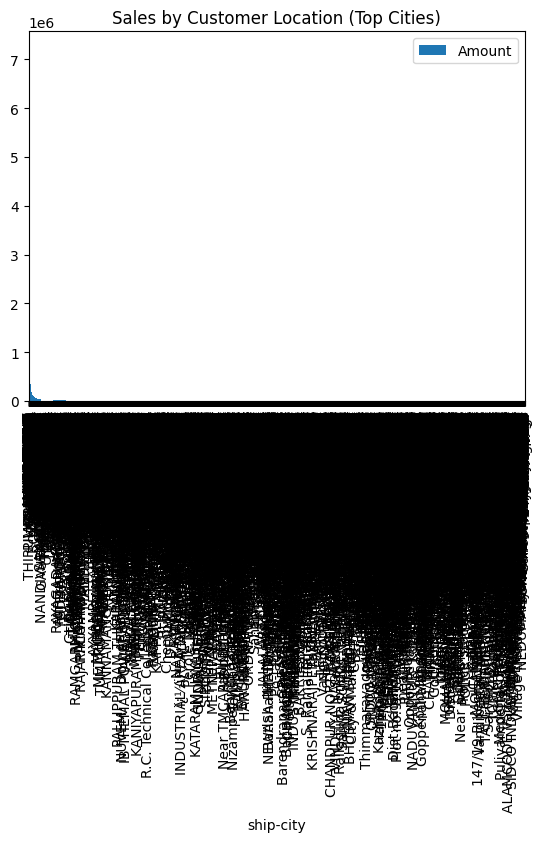

In [74]:
location_sales = df.groupby('ship-city').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False)
location_sales.plot(kind='bar', title='Sales by Customer Location (Top Cities)')

# 5. Geographical Analysis

In [75]:
#Question 1 : Aggregate sales data by state

In [76]:
state_sales = df.groupby('ship-state').agg({'Amount': 'sum'}).reset_index()

# Sort the data for better visualization
state_sales = state_sales.sort_values(by='Amount', ascending=False)

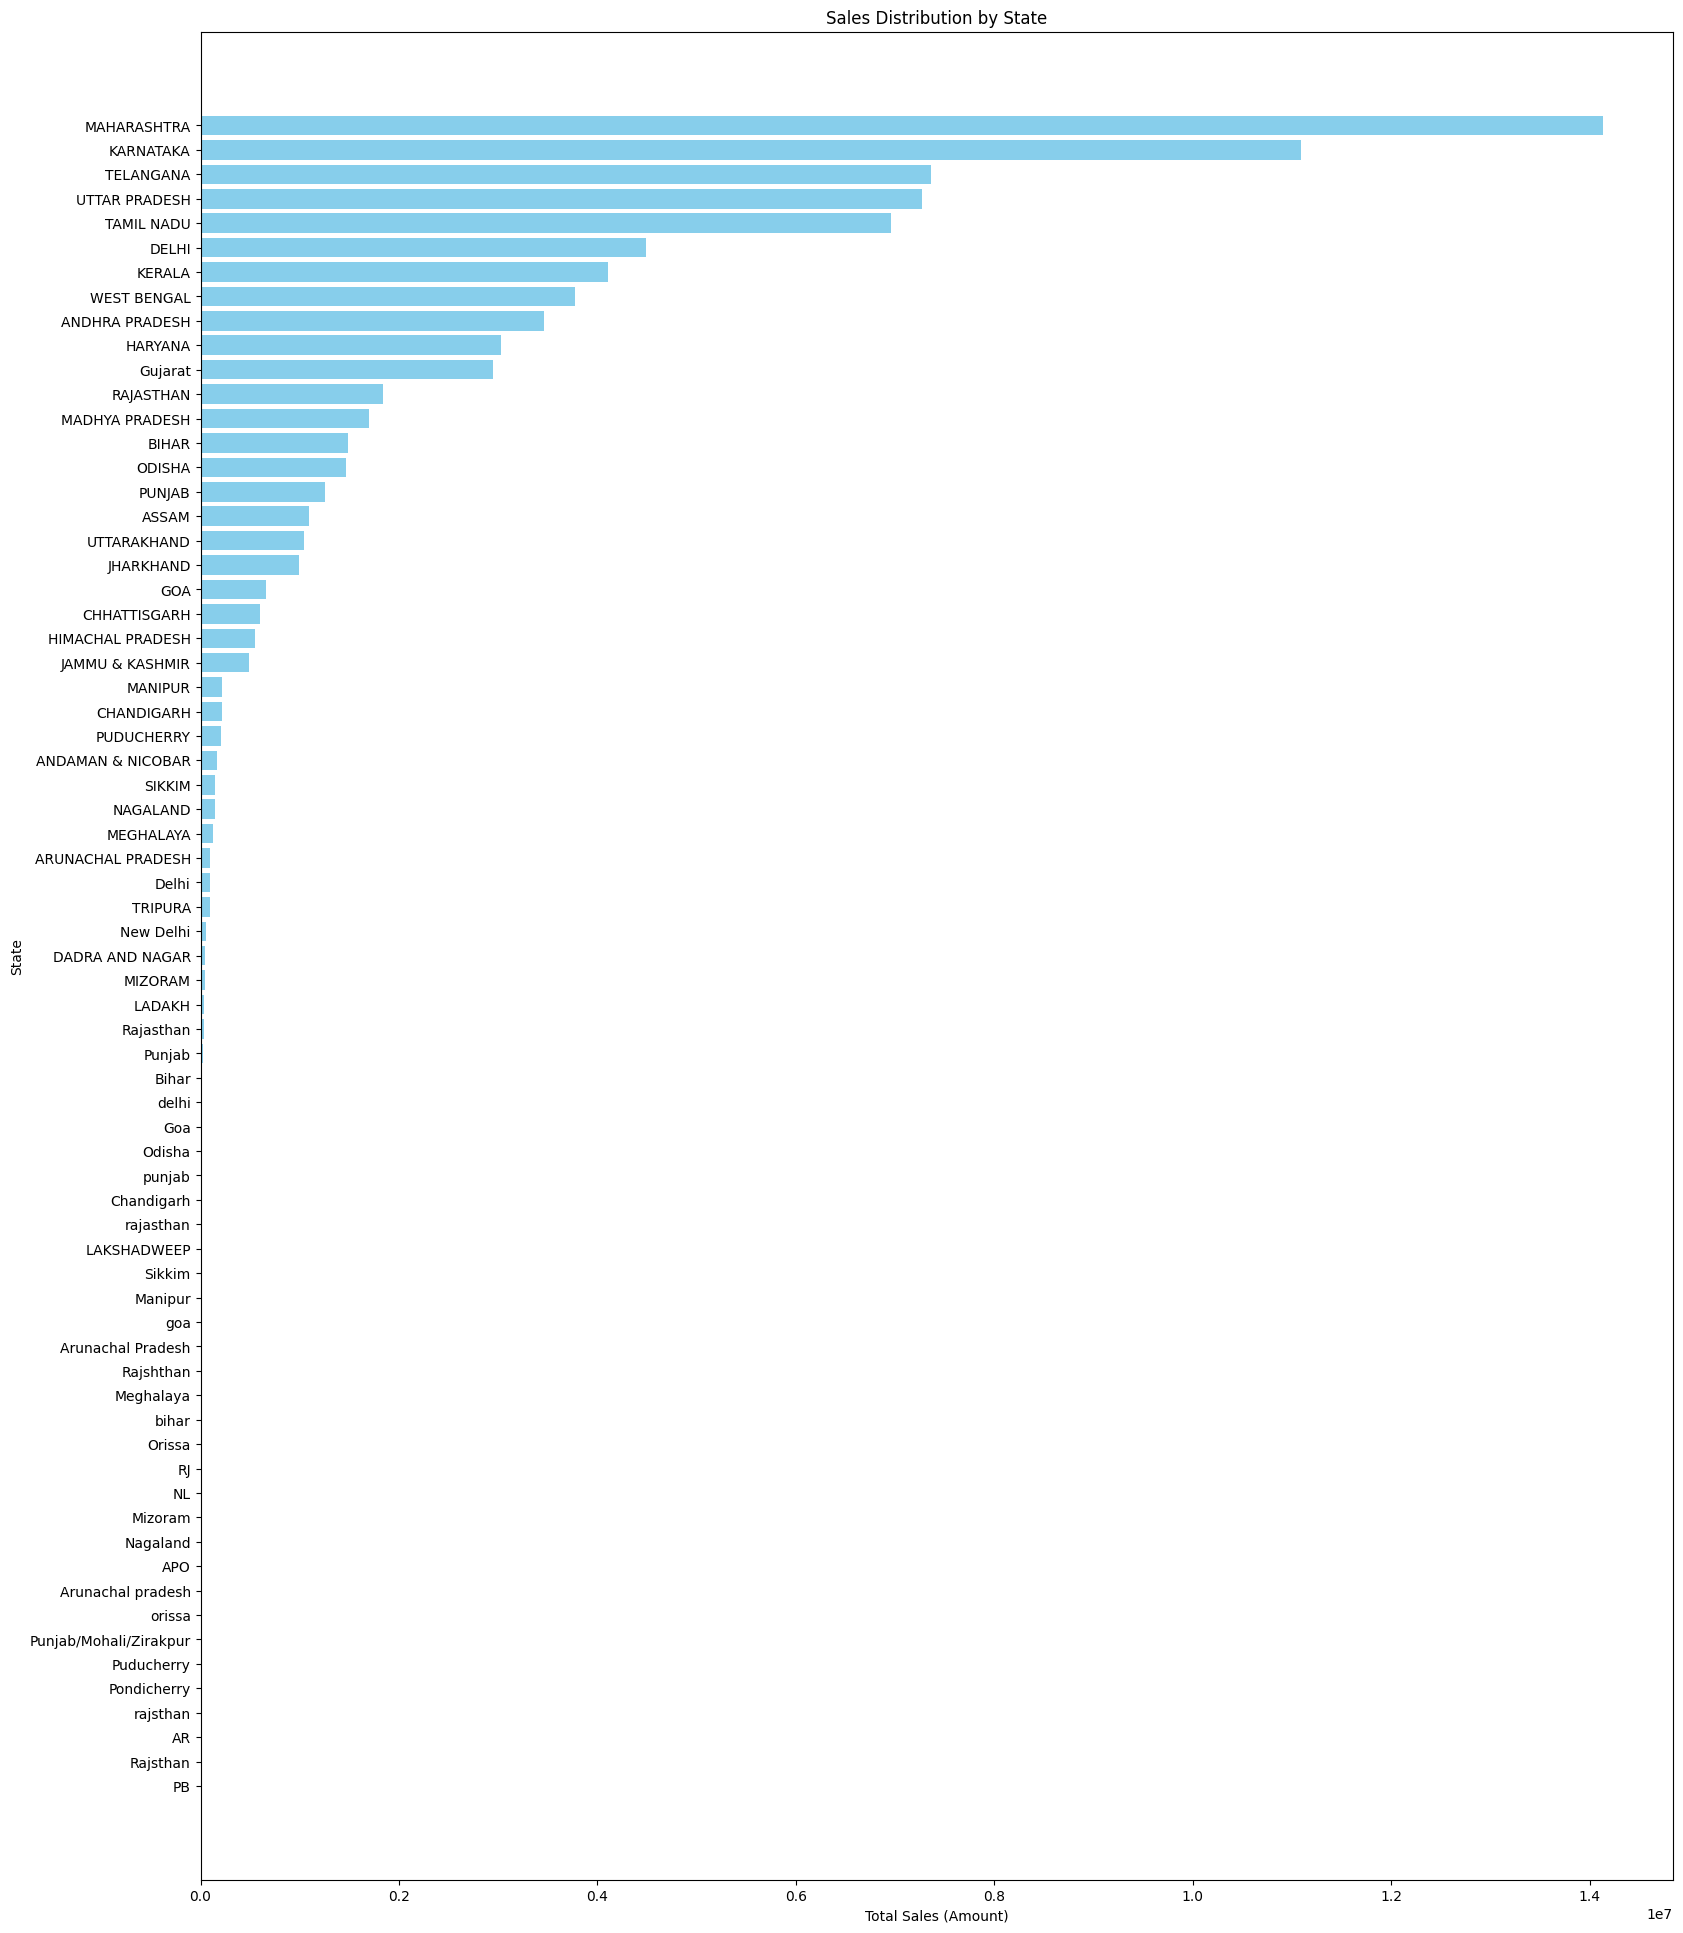

In [77]:
import matplotlib.pyplot as plt

# Plot sales by state
plt.figure(figsize=(19, 24))
plt.barh(state_sales['ship-state'], state_sales['Amount'], color='skyblue')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('State')
plt.title('Sales Distribution by State')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

In [78]:
#Question 2: Sales distribution by state

<Axes: title={'center': 'Sales Distribution by State'}>

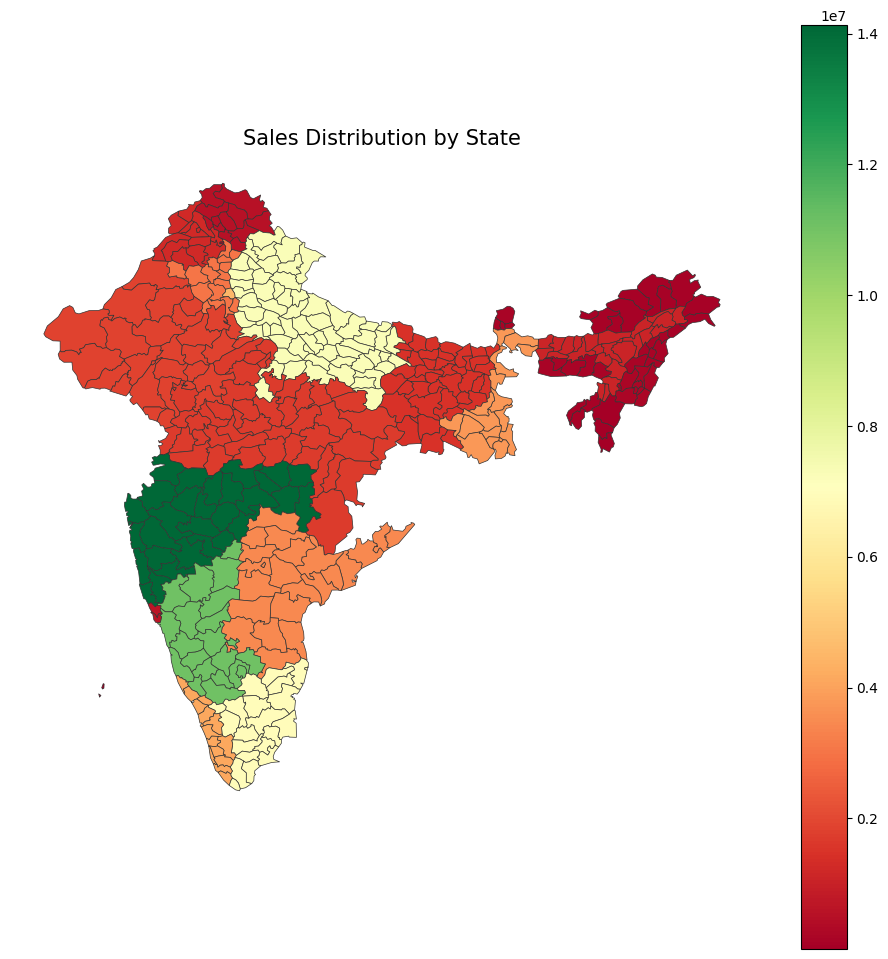

In [79]:
import geopandas as gpd

# Load a shapefile of the relevant region (e.g., states of India)
india_states = gpd.read_file('/Users/gungunkumari/Downloads/India Shape/india_ds.shp')

# Merge sales data with the geographical data
merged = india_states.set_index('STATE').join(state_sales.set_index('ship-state'))

# Plot the data
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Sales Distribution by State', fontdict={'fontsize': '15', 'fontweight': '3'})
merged.plot(column='Amount', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)

In [80]:
# Question 3 : Top 10 Cities generating the most sales

In [81]:
# Aggregate sales data by city
city_sales = df.groupby('ship-city').agg({'Amount': 'sum'}).reset_index()

# Sort the data for better visualization
city_sales = city_sales.sort_values(by='Amount', ascending=False)

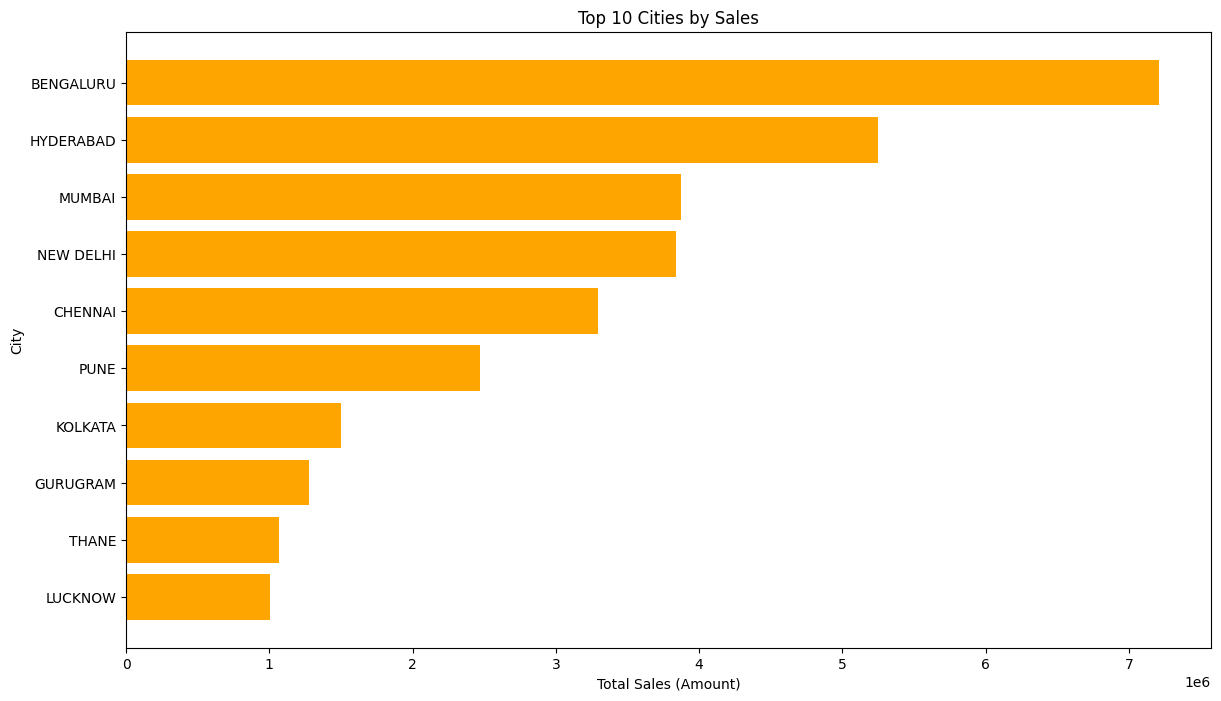

In [82]:
top_cities = city_sales.head(10)

plt.figure(figsize=(14, 8))
plt.barh(top_cities['ship-city'], top_cities['Amount'], color='orange')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('City')
plt.title('Top 10 Cities by Sales')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

In [83]:
# Question 4: Regions with higher return or cancellation rates?

In [84]:
cancellation_by_region = df[df['Status'] == 'Cancelled'].groupby('ship-state').agg({'Order ID': 'count'})
total_orders_by_region = df.groupby('ship-state').agg({'Order ID': 'count'})
cancellation_rate_by_region = (cancellation_by_region / total_orders_by_region) * 100

In [85]:
cancellation_rate_by_region

,Order ID
ship-state,
ANDAMAN & NICOBAR,17.578125
ANDHRA PRADESH,16.436337
APO,100.000000
AR,NaN
ARUNACHAL PRADESH,13.475177
...,...
goa,NaN
orissa,NaN
punjab,7.142857
